# **customer churn using neural network**

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
uploaded= files.upload()
customer_churn= list(uploaded.keys())[0]
df= pd.read_csv(customer_churn)

Saving customer_churn.csv to customer_churn.csv


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
del df["customerID"]

In [ ]:
df["TotalCharges"]= df.TotalCharges.astype(float)

<ipython-input-20-07e8e57fc1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"]= df.TotalCharges.astype(float)


In [ ]:
df= df[~(df.TotalCharges == ' ')]

In [ ]:
for cols in X.columns:
  print(f"{cols}:{X[cols].nunique()}")

gender:2
SeniorCitizen:2
Partner:2
Dependents:2
tenure:72
PhoneService:2
MultipleLines:2
InternetService:3
OnlineSecurity:2
OnlineBackup:2
DeviceProtection:2
TechSupport:2
StreamingTV:2
StreamingMovies:2
Contract:3
PaperlessBilling:2
PaymentMethod:4
MonthlyCharges:1584
TotalCharges:6530


In [ ]:
numerical_cols= [cols for cols in df.columns if df[cols].nunique() > 30]
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
df.drop_duplicates(inplace= True)

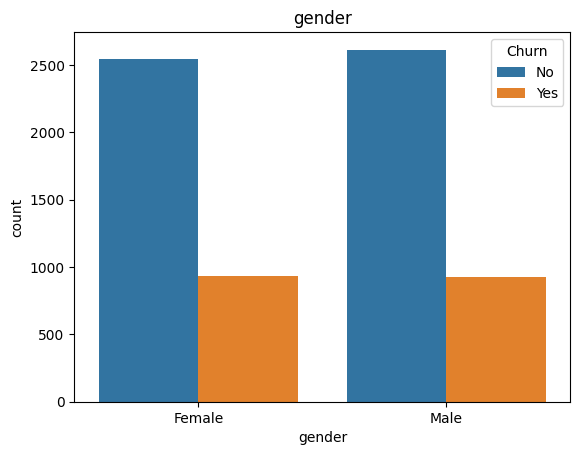

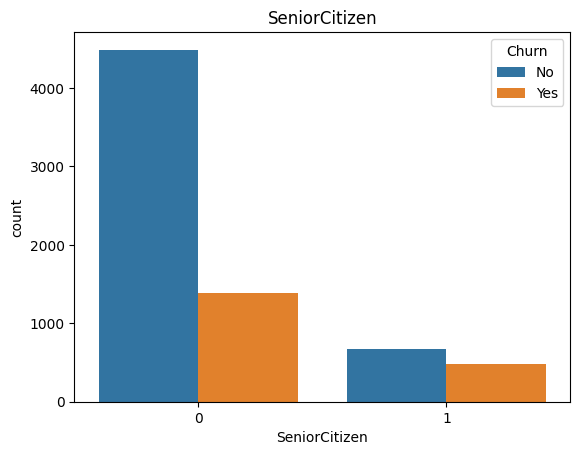

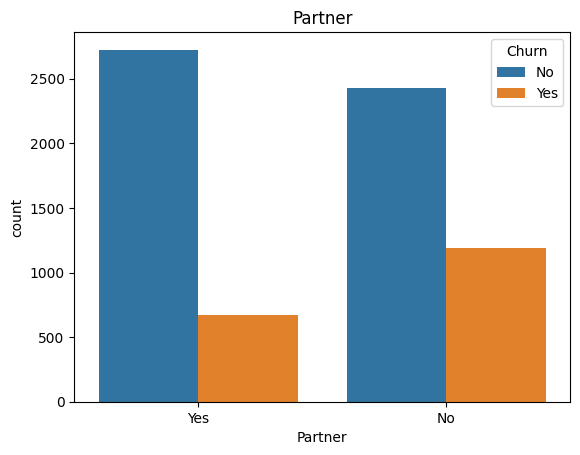

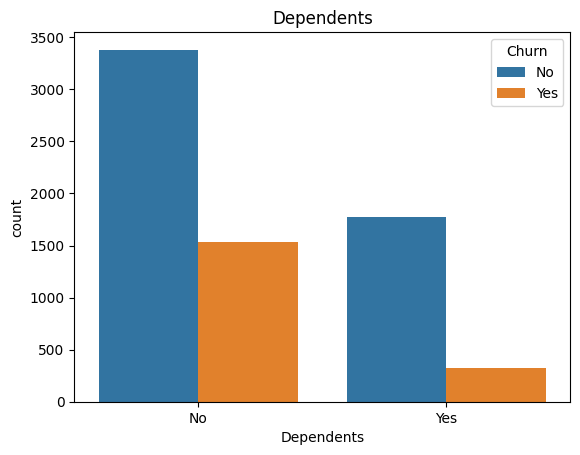

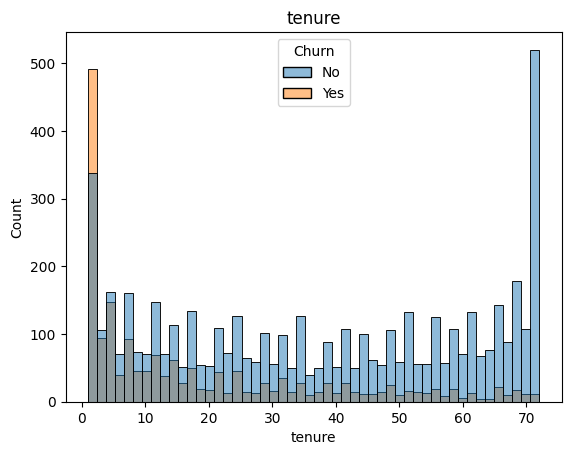

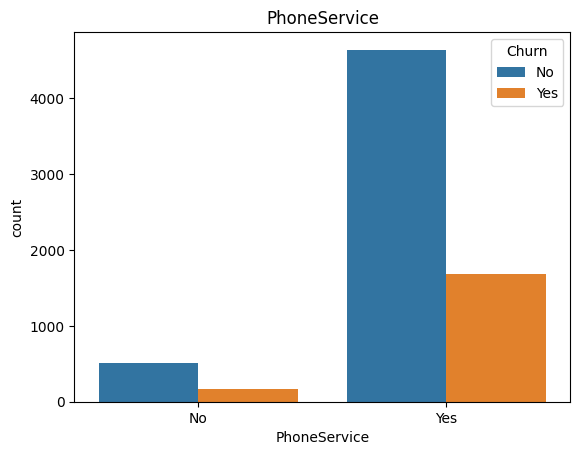

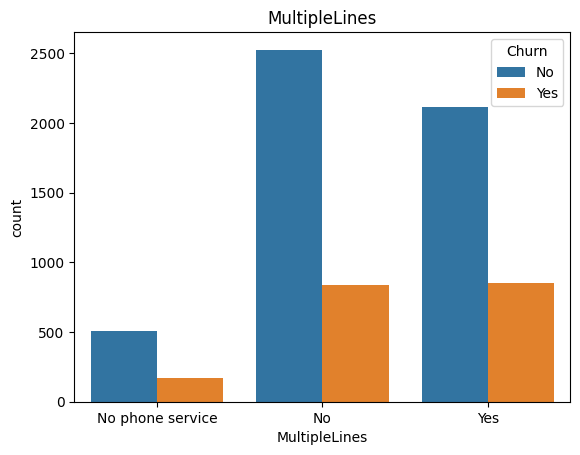

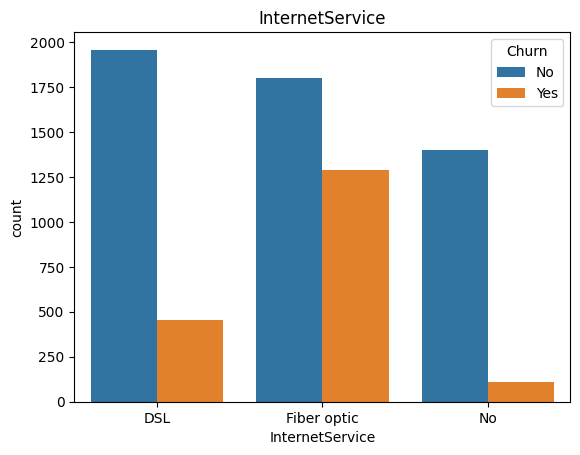

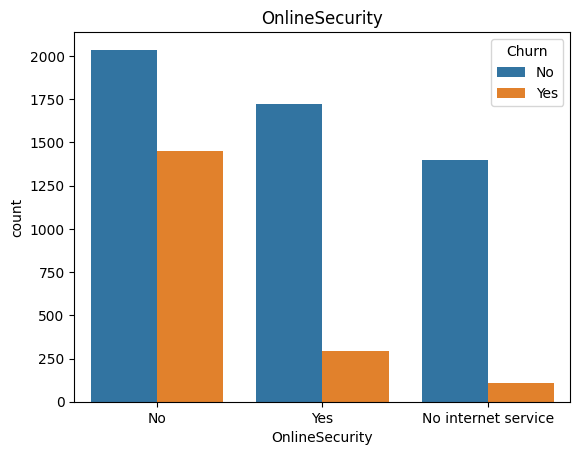

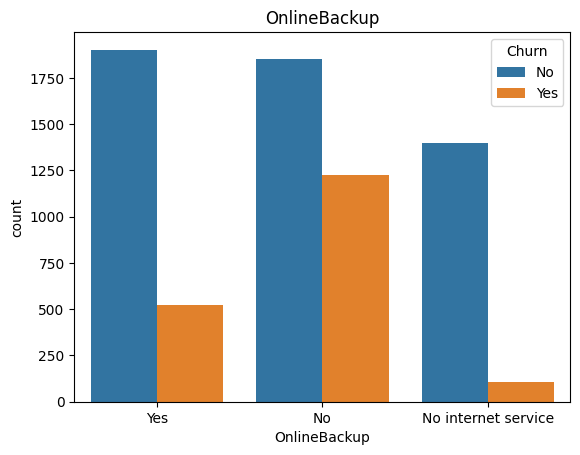

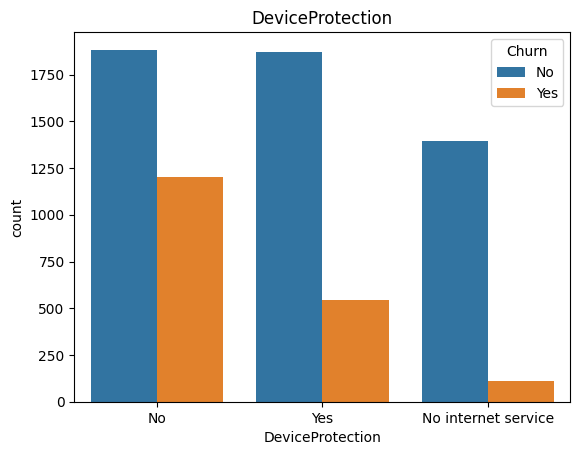

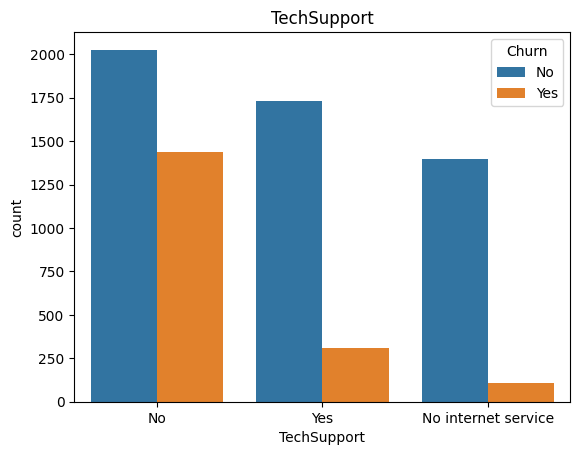

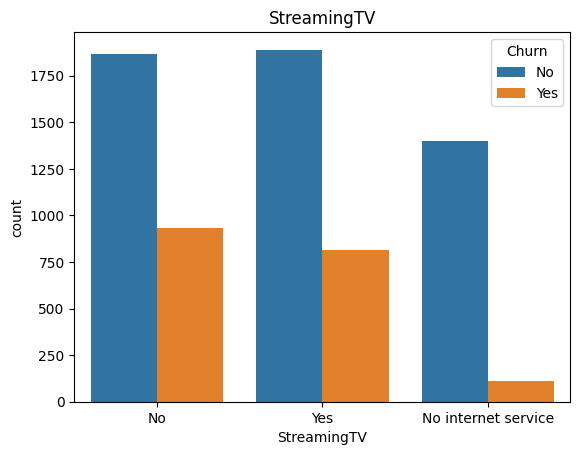

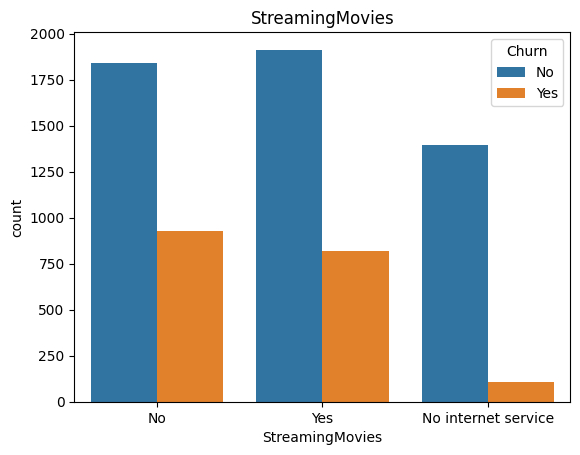

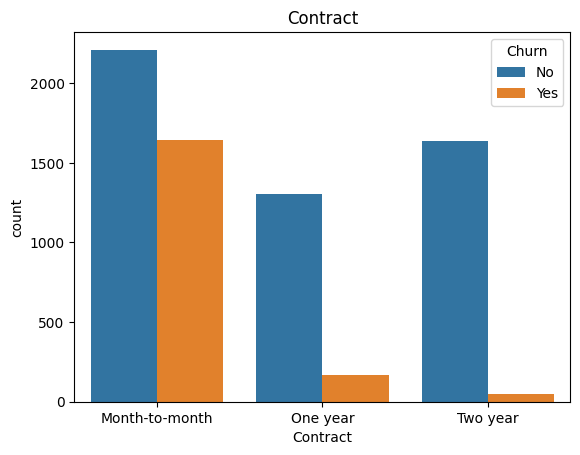

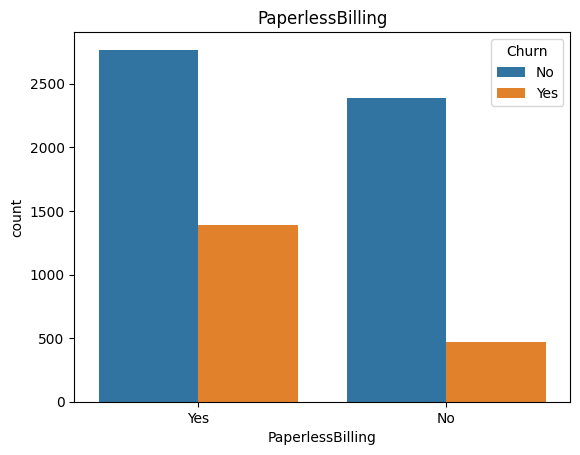

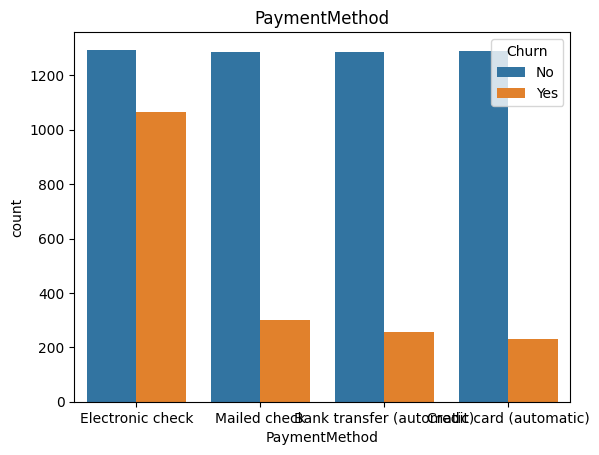

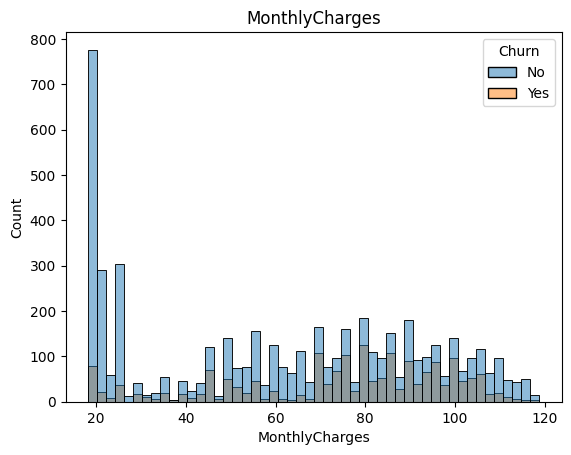

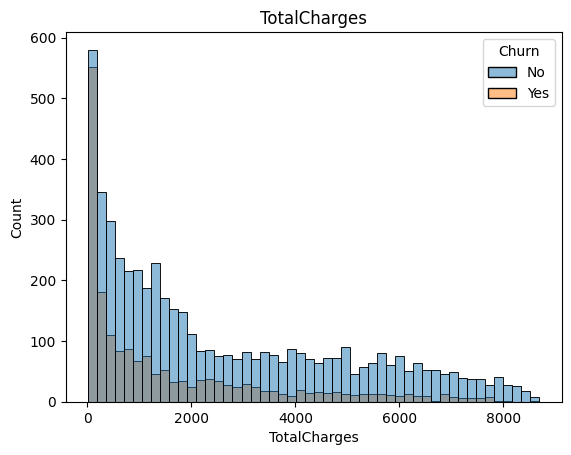

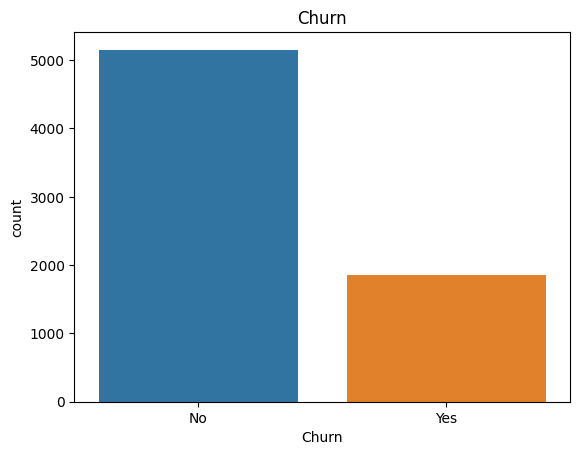

In [ ]:
for cols in df.columns:
  if cols in numerical_cols:
    plt.figure()
    sns.histplot(data= df,x= cols,hue= "Churn",bins= 50)
    plt.title(cols)
  else:
    plt.figure()
    sns.countplot(data=df,x= cols,hue= "Churn")
    plt.title(cols)



In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for cols in yes_no_columns:
  df[cols].replace({"Yes":1,"No":0},inplace= True)

In [ ]:
df.gender.replace({"Female":1,"Male":0},inplace= True)

In [ ]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'],dtype= int,drop_first= True)

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df[cols_to_scale]= scaler.fit_transform(df[cols_to_scale])

In [ ]:
X= df.drop("Churn",axis= 1)
y= df.Churn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= .2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
model= keras.Sequential([
    keras.layers.Dense(23,input_shape= (23,),activation= "relu"),
    keras.layers.Dense(15,activation= "relu"),
    keras.layers.Dense(1,activation= "sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer= "adam",
               loss= "binary_crossentropy",
               metrics= ["accuracy"])
model.fit(X_train,y_train,epochs= 3)

Epoch 1/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7418 - loss: 0.5572
Epoch 2/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4342
Epoch 3/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8075 - loss: 0.4177


In [ ]:
X.shape

(7010, 23)

In [ ]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.4270


[0.4313906133174896, 0.7853066921234131]

In [ ]:
predictions= model.predict(X_test)
predictions

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.023931  ],
       [0.03708785],
       [0.47567382],
       ...,
       [0.05687673],
       [0.03498059],
       [0.13176739]], dtype=float32)

In [ ]:
predict_labels= [1 if i > 0.5 else 0 for i in predictions]
predict_labels

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,predict_labels))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1009
           1       0.00      0.00      0.00       393

    accuracy                           0.72      1402
   macro avg       0.36      0.50      0.42      1402
weighted avg       0.52      0.72      0.60      1402



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

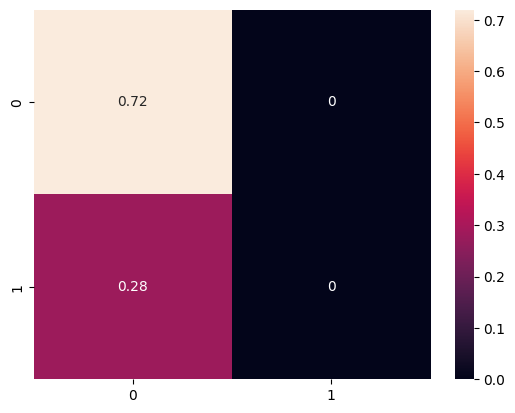

In [ ]:
cm= confusion_matrix(y_test,predict_labels,normalize= "all")
sns.heatmap(cm,annot= True)